# Building a computer vision app with Microsoft Azure

[Link to Microsoft Azure Computer Vision API](https://eastus.dev.cognitive.microsoft.com/docs/services/Cognitive_Services_Unified_Vision_API_2024-02-01/operations/61d65934cd35050c20f73ab6)

The Computer Vision API provides state-of-the-art algorithms to process images and return information. For example, it can be used to determine if an image contains mature content, or it can be used to find all the people in an image. It also has other features like categorizing the content of images, and describing an image with complete English sentences.

[Link to get API Key](https://portal.azure.com/#view/Microsoft_Azure_ProjectOxford/CognitiveServicesHub/~/overview)

Ocp-Apim-Subscription-Key provides access to API. Found in your Cognitive Services accounts.


## Imports

In [179]:
# Importing the libraries

import http.client, urllib.request, urllib.parse, urllib.error, base64
from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

## Functions needed in the code

In [180]:
# Function to draw a bounding box

def draw_bounding_boxes(image, words):
    for word in words:
        bounding_box = word['boundingPolygon']  # Get the bounding polygon coordinates
        pts = np.array([(point['x'], point['y']) for point in bounding_box], dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

In [163]:
# Tried this funciton to extract ingredients
## Needs modifications, so not used in the code

def extract_ingredients(text_content):
    ingredients = []
    start_extraction = False

    for word in text_content.split():
        text = word.lower()

        # Start extracting ingredients after detecting "ingredients"
        if text == "ingredients:":
            start_extraction = True
            continue  # Skip the word "ingredients"

        # Stop processing after the last item
        if text == "may":
            break

        if start_extraction:
            ingredients.append(word)

    return ingredients

## Image we will be reading

In [182]:
# URL of the image
image_url = "https://github.com/RiyaChhikara/100daysofComputerVision/raw/main/assets/23.jpg"

# Display the image
Image(url=image_url, width= 500, height=500)

## Azure Computer Vision API Key Configurations

In [183]:
subscription_key = '##########################' # Include your Subscription Key
array = 'read'
body = {
  "url": image_url #URL of the image
}
app_name = 'cv-app-2024'

One of the Request parameters is features. Here, we mention the visual features requested: tags, objects, caption, denseCaptions, read, smartCrops, people. At least one visual feature must be specified.

In [166]:
headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.parse.urlencode({
    # Request parameters
    'features': array,
    'model-version': 'latest',
    'language': 'en'
})

try:
    conn = http.client.HTTPSConnection(f'{app_name}.cognitiveservices.azure.com')
    conn.request("POST", "/computervision/imageanalysis:analyze?api-version=2024-02-01&%s" % params, json.dumps(body), headers)
    response = conn.getresponse()
    data = response.read()
    print("Successful in reading the iamge")
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))


Successful in reading the iamge


## Reading the Image

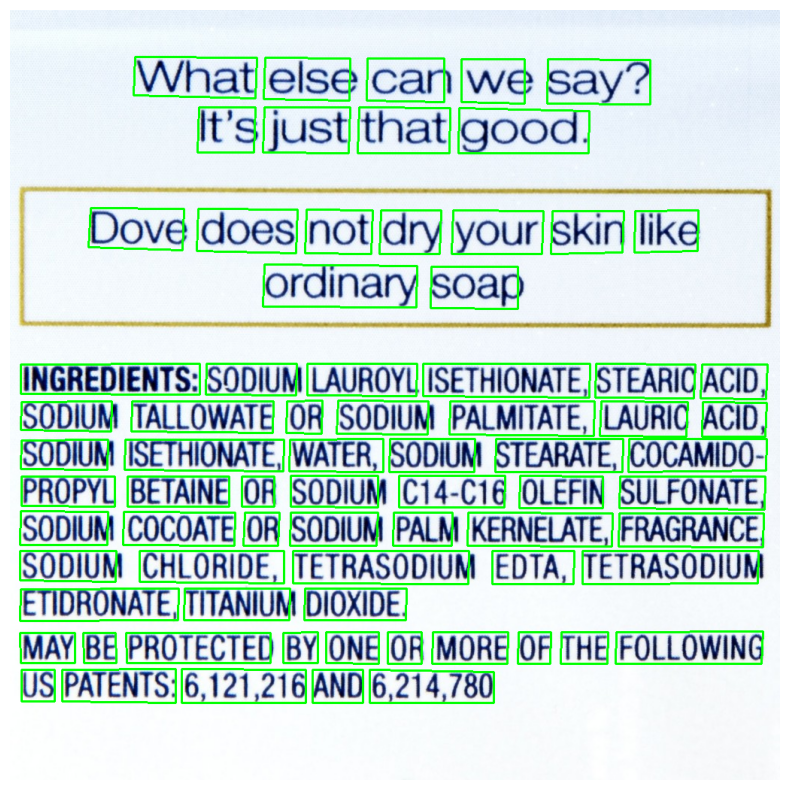

In [178]:
json_data = json.loads(data)  # Parse JSON

# Extracting text content
text_content = ""
if 'readResult' in json_data:
  words = []
  for line in json_data['readResult']['blocks'][0]['lines']:
    words.extend(line.get('words', []))

    # Draw bounding boxes around text regions
    image = cv2.imread("/content/23.jpg")  # Load the image
    image_with_boxes = draw_bounding_boxes(image.copy(), words)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()